# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [2]:
# Importing libraries
from requests import get
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
# Getting the picture from that lorem picsum server
url = "https://picsum.photos/id/69/500"
response = get(url) #i got to know that you can even import get function from requests module
pic = Image.open(BytesIO(response.content))

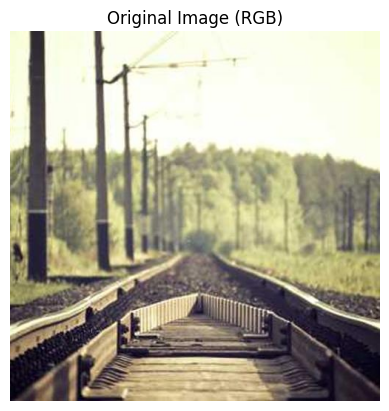

In [4]:
# Displaying RGB image
plt.imshow(pic)
plt.title("Original Image (RGB)")
plt.axis("off")
plt.show()

In [5]:
# Converting RGB image to numpy array....
banana = np.array(pic)

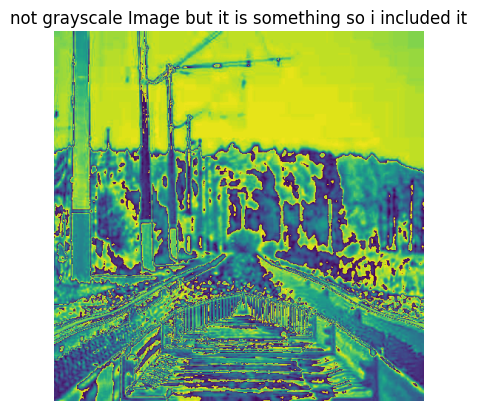

In [6]:
# Wrong map usage
Morefaultynotgray = ((banana[:,:,0] + banana[:,:,1] + banana[:,:,2]) / 3).astype(np.uint8)
plt.imshow(Morefaultynotgray) # i found out that i have to write some cmap= gray otherwise it doesnt know which colours to fill acc to those numbers
plt.title("not grayscale Image but it is something so i included it")
plt.axis("off")
plt.show()

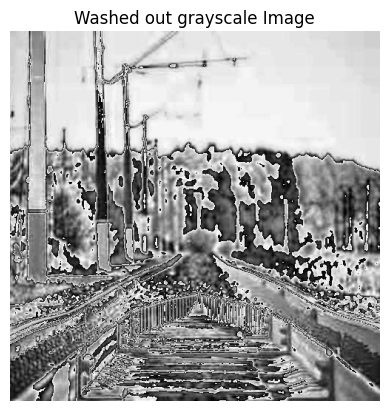

In [7]:
# Washed out grayscale(not good)
faultygray = ((banana[:,:,0] + banana[:,:,1] + banana[:,:,2]) / 3).astype(np.uint8)
plt.imshow(faultygray, cmap='gray')
plt.title("Washed out grayscale Image")
plt.axis("off")
plt.show()

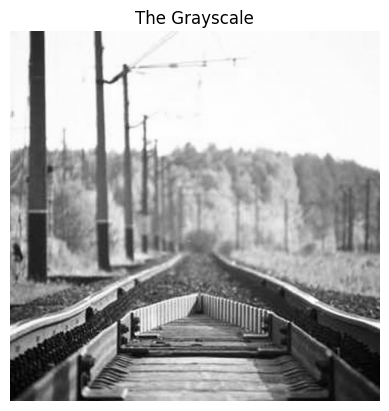

In [8]:
# Grayscale Image
Gray = (0.3 * banana[:,:,0] + 0.59 * banana[:,:,1] + 0.11 * banana[:,:,2]).astype(np.uint8)
plt.imshow(Gray, cmap='gray')
plt.title("The Grayscale")
plt.axis("off")
plt.show()

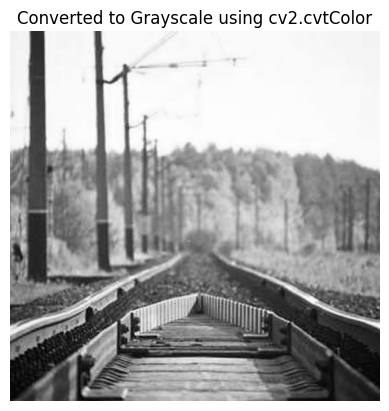

In [9]:
# Using OpenCV to convert the image to grayscale
CVGray = cv2.cvtColor(banana, cv2.COLOR_BGR2GRAY)
plt.imshow(CVGray, cmap='gray')
plt.title("Converted to Grayscale using cv2.cvtColor")
plt.axis("off")
plt.show()

# there is not much difference between cv2 and numpy methods

In [10]:
# printing shapes of RGB and Grayscale images
print("RGB Image shape:", banana.shape)
print("Grayscale image shape:", Gray.shape)
# !!NOTE!! 500 might not be the correct width and height becaus the in the url i typed, i specified the size as 500

RGB Image shape: (500, 500, 3)
Grayscale image shape: (500, 500)


In [11]:
# printing pure numbers
print("Values go brrrrr...", banana[:2, :2])
print("Printing Gray value")
print("-------")
print("|" , Gray[69,67] , "|")
print("-------")

Values go brrrrr... [[[244 250 214]
  [244 250 214]]

 [[244 250 214]
  [244 250 214]]]
Printing Gray value
-------
| 251 |
-------


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [12]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [41]:
# FFT and shifting the frequencies
f = np.fft.fft2(Gray)
fshift = np.fft.fftshift(f)

In [42]:
# Part B2
# Computing Magnitude
magnitude = np.abs(fshift)
magnitude_spectrum = np.log(magnitude + 1)
# Computing the Phase
phase = np.angle(fshift)

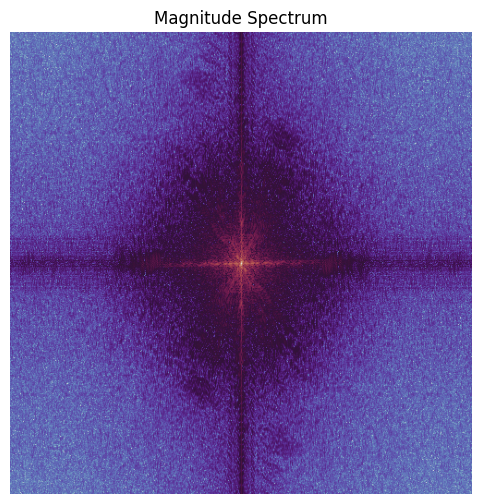

In [45]:
# Displaying Magnitude spectrum
plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='twilight') # i thought using gray colour map is boring to display the spectrum
plt.title("Magnitude Spectrum")
plt.axis("off")
plt.show()

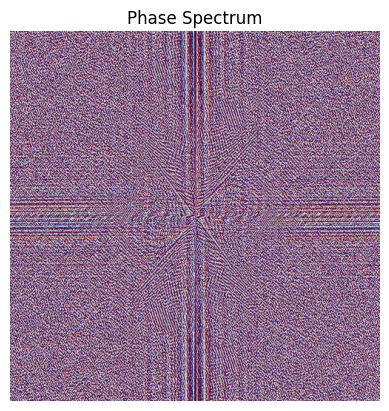

In [38]:
# Displaying phase spectrum(for fun)
plt.imshow(phase, cmap='twilight') 
plt.title("Phase Spectrum")
plt.axis("off")
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [47]:
# Making some mask function i guess
def make_lpf_mask(shape, radius):
    H, W = shape
    cx, cy = W//2, H//2
    mask = np.zeros((H, W), np.uint8)

    for y in range(H):
        for x in range(W):
            if (x - cx)**2 + (y - cy)**2 <= radius**2: # i am not using cv2.circle here to make that mask in that zero matrix
                mask[y, x] = 1
    return mask


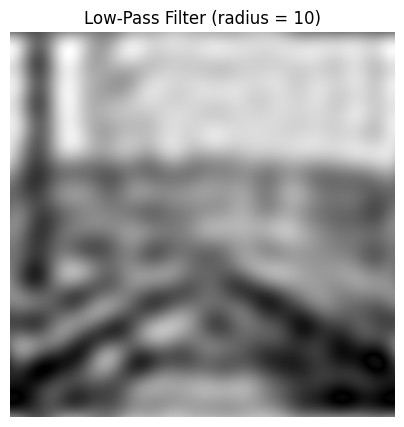

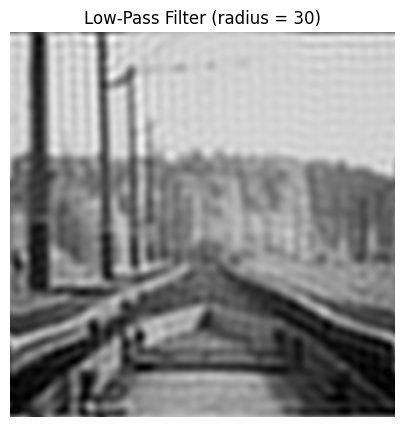

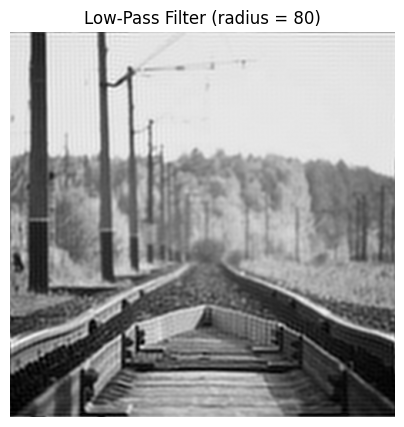

In [53]:
# making a for loop for 3 radii
for r in [10, 30, 80]:
    mask = make_lpf_mask(Gray.shape, r)
    f_low = fshift * mask

    f_ishift = np.fft.ifftshift(f_low)
    recons = np.fft.ifft2(f_ishift)
    Recons = np.abs(recons)

    plt.figure(figsize=(5,5))
    plt.imshow(Recons, cmap='gray')
    plt.title(f"Low-Pass Filter (radius = {r})")
    plt.axis("off")
    plt.show()

# As radius decreases only number of high frequencies decrease making the image blurrier

In [77]:
#  C2
# Making a HPF mask
HPF_Mask = 1 - make_lpf_mask(Gray.shape, 80)

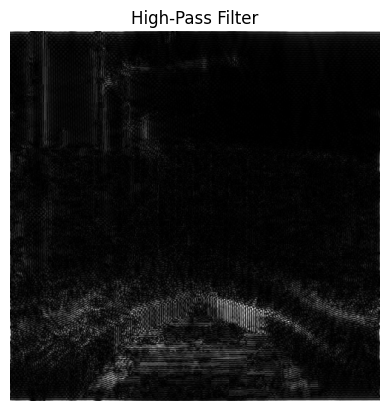

In [78]:
f_high = fshift * HPF_Mask

f_ishift = np.fft.ifftshift(f_high)
beacons = np.fft.ifft2(f_ishift)
Beacons = np.abs(beacons)

plt.imshow(Beacons, cmap='gray')
plt.title("High-Pass Filter")
plt.axis("off")
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

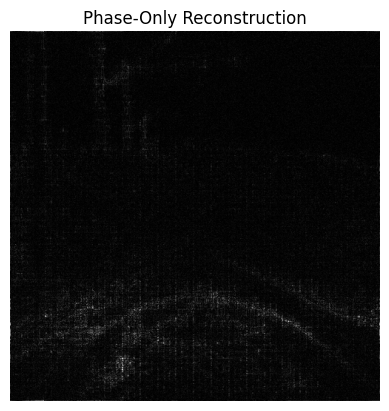

In [92]:
#  following orders
m = np.abs(fshift)
phase_only = fshift / m
# inverse FFT steps
ishift = np.fft.ifftshift(phase_only)
recon_phase = np.fft.ifft2(ishift)
recon_phase = np.abs(recon_phase)

plt.imshow(recon_phase, cmap='gray')
plt.title("Phase-Only Reconstruction")
plt.axis("off")
plt.show()


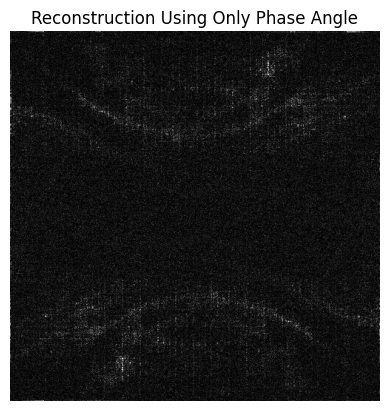

In [89]:
#  Reconstruction using np.angle(fshift)
phase_angle = np.angle(fshift)

ishift = np.fft.ifftshift(phase_angle)
recon_angle = np.fft.ifft2(ishift)
recon_angle_abs = np.abs(recon_angle)

plt.imshow(recon_angle_abs, cmap='gray')
plt.title("Reconstruction Using Only Phase Angle")
plt.axis("off")
plt.show()

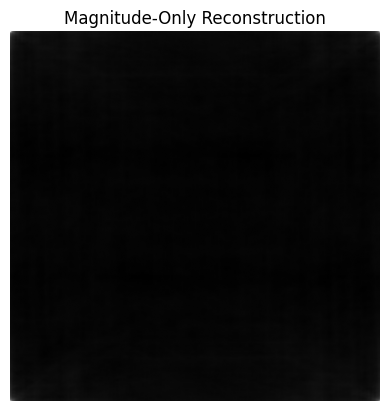

In [86]:
# D2
mag_only = np.abs(fshift)
# mag_only = np.log(np.abs(fshift) + 1)

mag_only_complex = mag_only * np.exp(1j * 0)

ishift = np.fft.ifftshift(mag_only_complex)
recon_mag = np.fft.ifft2(ishift)
recon_mag = np.abs(recon_mag)

plt.imshow(recon_mag, cmap='gray')
plt.title("Magnitude-Only Reconstruction")
plt.axis("off")
plt.show()

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

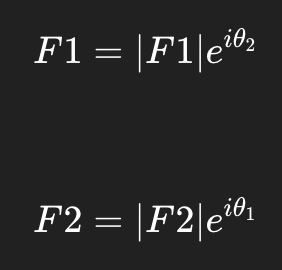

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.